# Sigmoid Exam Part 2

## Data Importation

Connect to Google Drive.

In [341]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import some important libraries:

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset:

In [343]:
data = pd.read_csv('/content/data_v4.csv')
data.head()

,Unnamed: 0,app_id,title,release_date,genres,categories,developer,publisher,discounted_price,dlc_available,age_rating,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count
0,0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,0.0,1,0,"For over two decades, Counter-Strike has offer...",True,False,True,1,Very Positive,87.0,8062218.0
1,1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,0.0,2,0,"Every day, millions of players worldwide enter...",True,True,True,0,Very Positive,81.0,2243112.0
2,2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,3999.0,0,1,A storm is coming. Venture into the complete G...,True,False,False,0,Very Positive,89.0,12294.0
3,3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,3599.0,2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,6,Very Positive,93.0,605191.0
4,4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,0.0,14,1,Destiny 2 is an action MMO with a single evolv...,True,False,False,0,Very Positive,80.0,594713.0


In [344]:
data.columns

Index(['Unnamed: 0', 'app_id', 'title', 'release_date', 'genres', 'categories',
       'developer', 'publisher', 'discounted_price', 'dlc_available',
       'age_rating', 'about_description', 'win_support', 'mac_support',
       'linux_support', 'awards', 'overall_review', 'overall_review_%',
       'overall_review_count'],
      dtype='object')

I will drop the unnecessary columns such as 'Unnamed: 0' and 'app_id'.

In [345]:
data = data.drop(columns=['Unnamed: 0','app_id'])

## Exploratory Data Analysis

Now that the dataset doesn't contain any NaN values, we can proceed with the analysis of data.

###Univariate Analysis

In [346]:
data.describe()

,discounted_price,dlc_available,age_rating,awards,overall_review_%,overall_review_count
count,39952.000000,39952.000000,39952.000000,39952.000000,39952.000000,3.995200e+04
mean,355.262165,0.758385,0.058270,0.325115,77.170730,2.500934e+03
std,450.308165,4.814032,0.234256,1.290559,17.666591,4.892032e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01
25%,59.000000,0.000000,0.000000,0.000000,68.000000,2.100000e+01
50%,250.000000,0.000000,0.000000,0.000000,81.000000,5.900000e+01
75%,479.000000,0.000000,0.000000,0.000000,91.000000,2.810000e+02
max,8325.000000,200.000000,1.000000,41.000000,100.000000,8.062218e+06



   - Prices after discount range from 0 to 8,325 rupees, with an average discounted price of 355.26 units. The standard deviation of 450.31 indicates significant variability in discounted prices among the applications.

   - The DLC (Downloadable Content) availability shows that at least 75% of the applications do not offer downloadable content, with a minimum of 0 and a maximum of 200 DLCs.

   - The age rating attribute is a value between 0 and 1, with a mean of 0.058. This suggests that the majority of applications are not age-restricted, as the 75th percentile value is also 0.

   - The awards attribute ranges from 0 to 41, with a mean of 0.325, indicating that most applications do not receive awards. This is further supported by the 75th percentile value being 0.

   - The overall review percentage ranges from 0 to 100%, with a mean of 77.17% and a standard deviation of 17.67%. The 25th, 50th, and 75th percentiles are 68%, 81%, and 91% respectively, showing a generally positive reception from users.

   - The count of overall reviews ranges from 10 to 8,062,218, with a mean of 2,500.93 and a standard deviation of 48,920.32. The large standard deviation and the significantly higher maximum review count suggest a few very popular applications skewing the average.


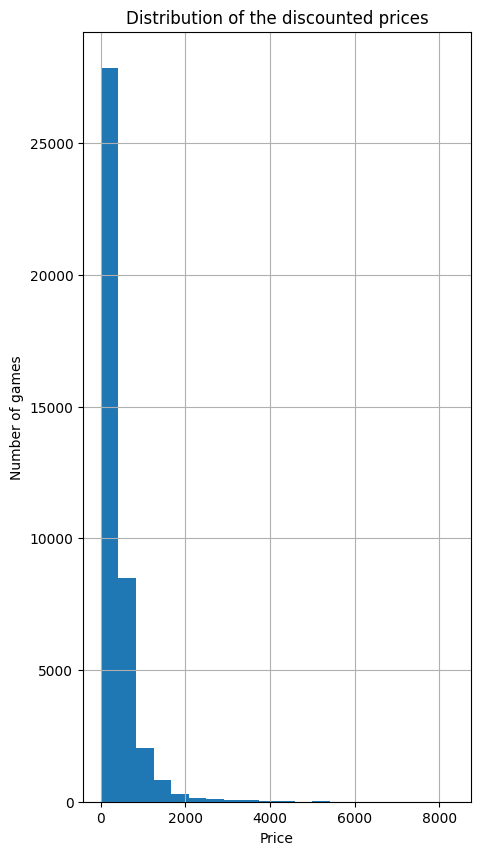

In [347]:
data['discounted_price'].hist(bins=20, figsize=(5, 10))
plt.title('Distribution of the discounted prices')
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

This distribution is right-skewed, with majority of discounted prices being Free or mostly under 2000 rupees.

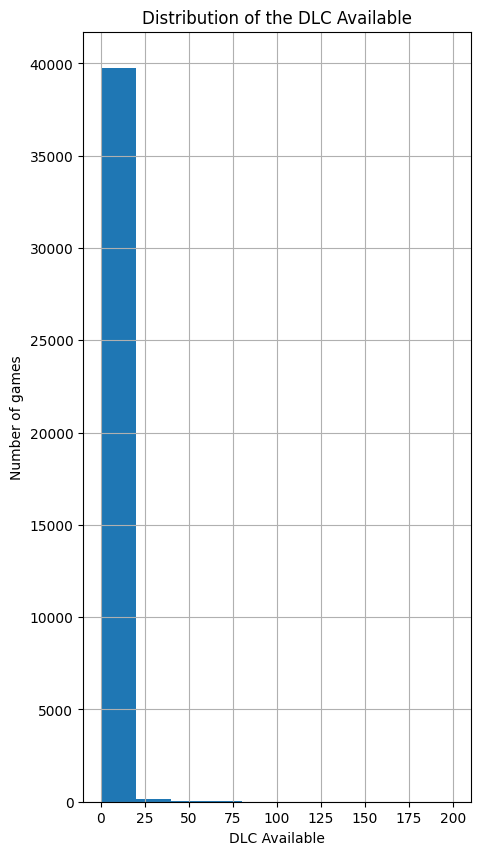

In [348]:
data['dlc_available'].hist(bins=10, figsize=(5, 10))
plt.title('Distribution of the DLC Available')
plt.xlabel('DLC Available')
plt.ylabel('Number of games')
plt.show()

This distribution is right-skewed, with the number of downloadable content being 0 or less than 25.

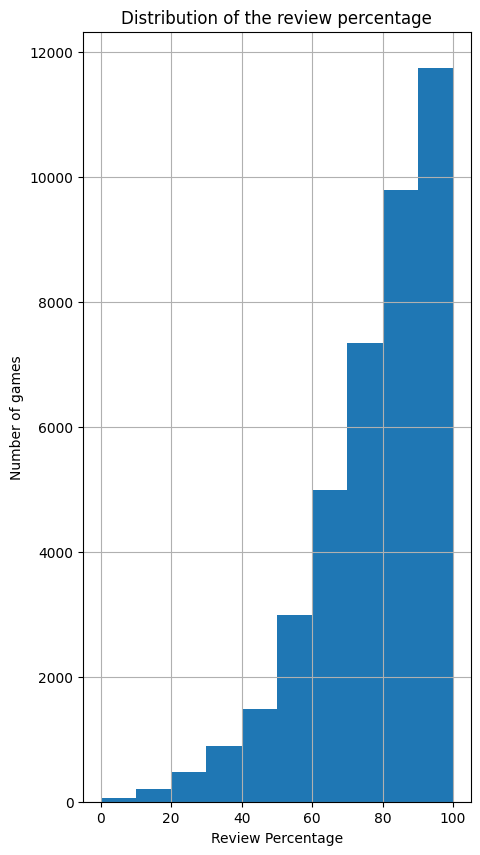

In [349]:
data['overall_review_%'].hist(bins=10, figsize=(5, 10))
plt.title('Distribution of the review percentage')
plt.xlabel('Review Percentage')
plt.ylabel('Number of games')
plt.show()

This distribution is left-skewed, indicating that most of the games have a positive and high review score.

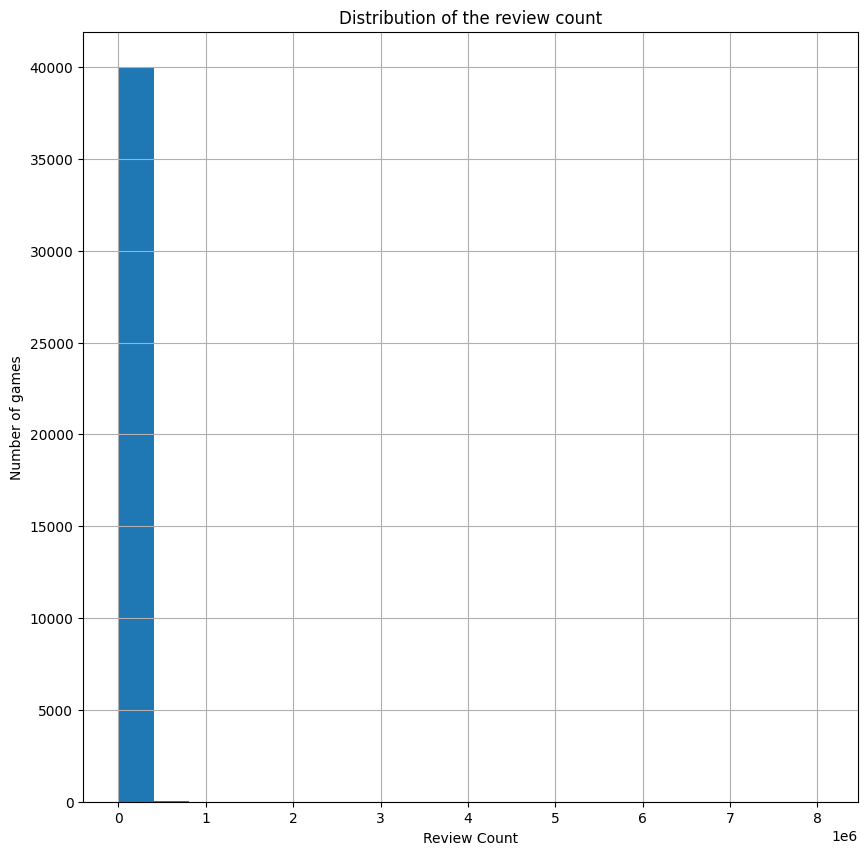

In [350]:
data['overall_review_count'].hist(bins=20, figsize=(10, 10))
plt.title('Distribution of the review count')
plt.xlabel('Review Count')
plt.ylabel('Number of games')
plt.show()

This distribution is right-skewed, indicating that most of the games have less than 1000000 reviews.

In [351]:
data['age_rating'].value_counts()

age_rating
0    37624
1     2328
Name: count, dtype: int64

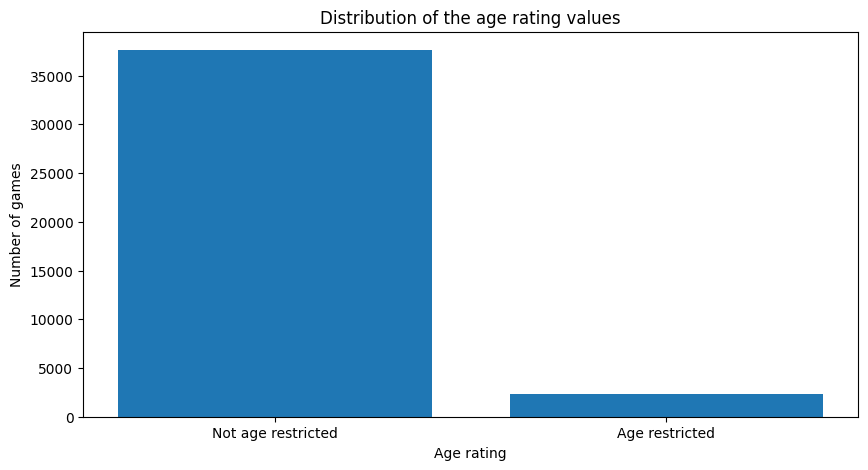

In [352]:
age_counts = data['age_rating'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(['Not age restricted', 'Age restricted'], height=[age_counts.get(0, 0), age_counts.get(1, 0)])
plt.xlabel('Age rating')
plt.ylabel('Number of games')
plt.title('Distribution of the age rating values')
plt.show()

This plot shows that most of the games are not age restricted, with less than 3000 games being age restricted.

In [353]:
data['release_year'] = data['release_date'].str[-4:].astype(int)
data['release_year']

0        2012
1        2013
2        2024
3        2022
4        2019
         ... 
39947    2008
39948    2016
39949    2014
39950    2017
39951    2015
Name: release_year, Length: 39952, dtype: int64

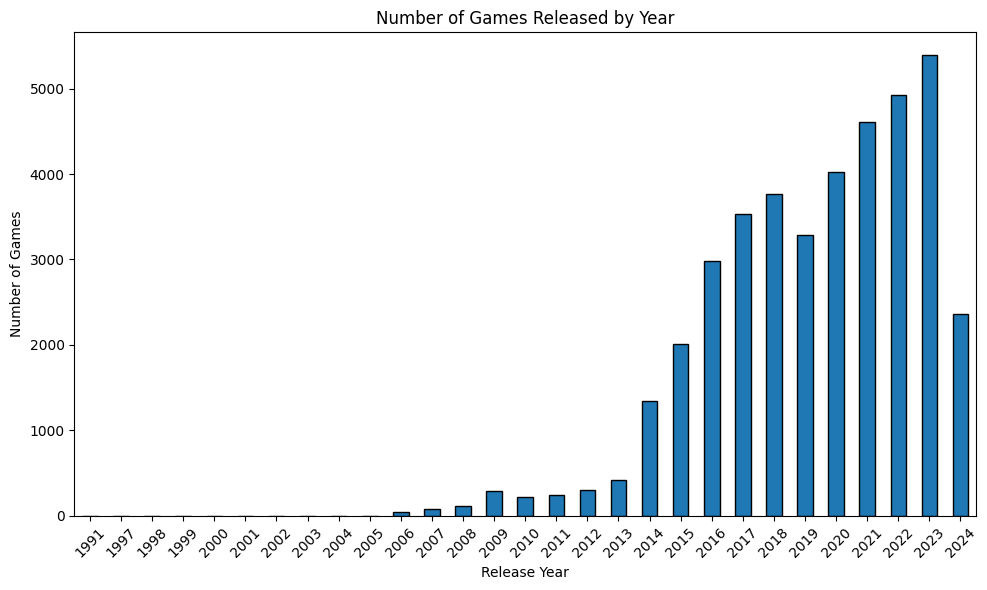

In [354]:
data['release_year'] = data['release_date'].str[-4:].astype(int)
data['release_year']
games_per_year = data['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Released by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This distribution is left-skewed indicating that most of the games were released after 2000s, with the peak between 2014 and 2024. This represent an ongoing tendency of game development.

In [355]:
genres_split = data['genres'].str.split(', ')

genre_counts = {}
for genres in genres_split:
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

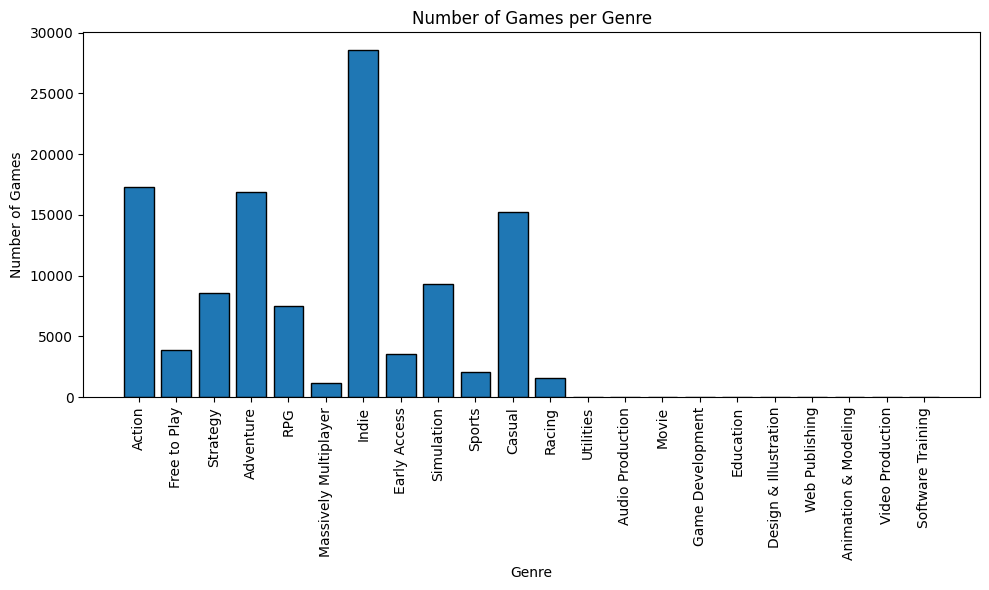

In [356]:
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

plt.figure(figsize=(10, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Games per Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There are approximately 20,000 games in each category such as adventure, action, and casual games. The Indie game genre holds a notable position, alongside genres like strategy, simulation, racing, and others.

In [357]:
categories_split = data['categories'].str.split(', ')

category_counts = {}
for categories in categories_split:
    for category in categories:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

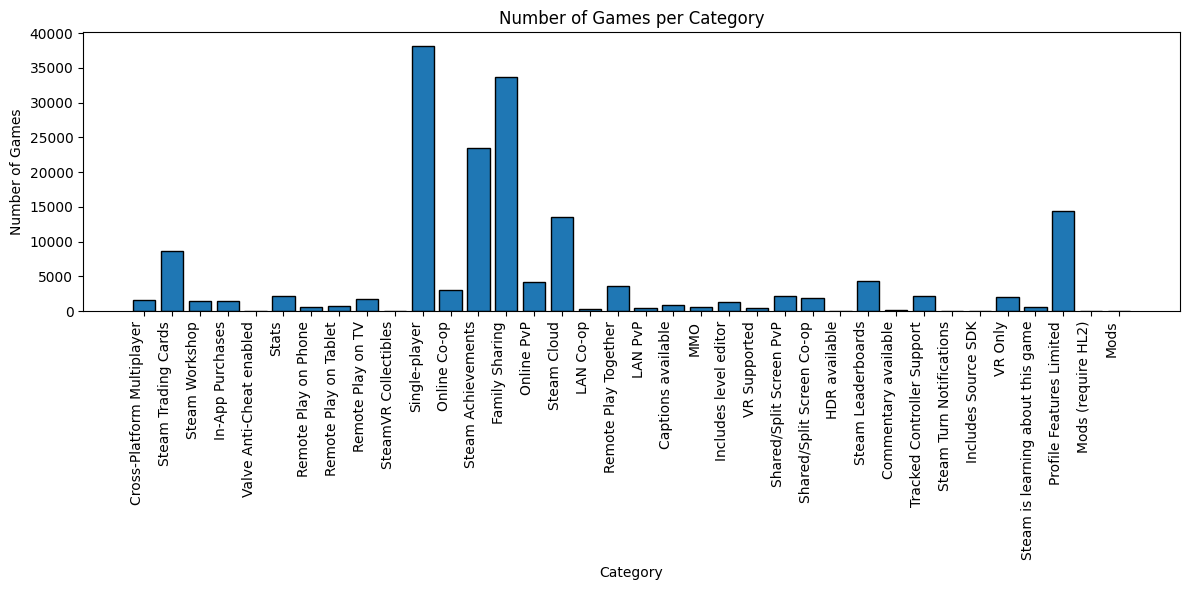

In [358]:
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

plt.figure(figsize=(12, 6))
plt.bar(category_counts_df['Category'], category_counts_df['Count'], edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Number of Games')
plt.title('Number of Games per Category')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

There is a variety of categories, most popular being Single-Player, Steam Acievements, Family Sharing and Profile Features Limited. Least popular categories include Mods, Valve Anti-Cheat enabled, HDR available and others.

In [359]:
developers = data['developer'].value_counts()
developers

developer
Choice of Games             122
Laush Dmitriy Sergeevich    103
Sokpop Collective            87
Square Enix                  80
Dnovel                       74
                           ... 
Thaddeus Psarris              1
Rutger van Dijk               1
ALFINA GAMERS                 1
Morgopolis Studios            1
Stoneworks Games              1
Name: count, Length: 23910, dtype: int64

In [360]:
publishers = data['publisher'].value_counts()
publishers

publisher
Big Fish Games            164
Conglomerate 5            148
Kagura Games              135
Sekai Project             132
THQ Nordic                131
                         ... 
SmartOliveGames LTD         1
GKStudio                    1
Heavy Spectrum Limited      1
Pixel Gangsta Studio        1
Stoneworks Games            1
Name: count, Length: 19913, dtype: int64

There are too many developers and publishers, I won't be able to plot their count of games.

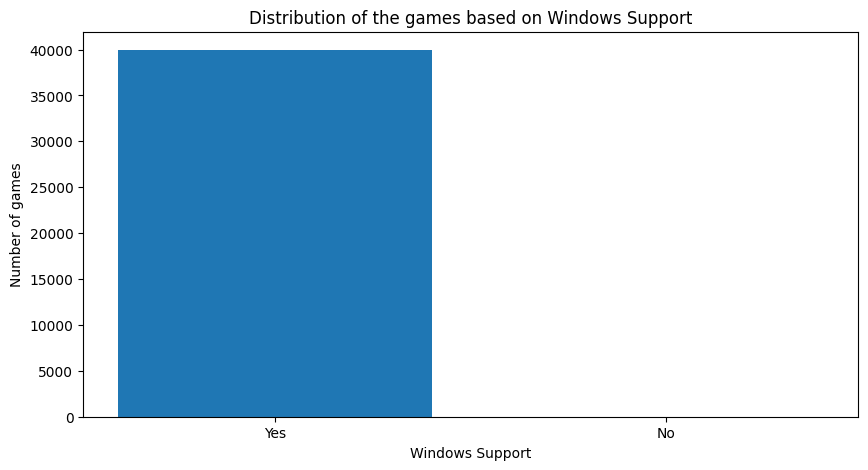

In [361]:
win_support = data['win_support'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(['Yes', 'No'], height=[win_support.get(0, 0), win_support.get(1, 0)])
plt.xlabel('Windows Support')
plt.ylabel('Number of games')
plt.title('Distribution of the games based on Windows Support')
plt.show()

Almost all games are available on Windows.

In [362]:
win_support = data['win_support'].value_counts()
win_support

win_support
True     39949
False        3
Name: count, dtype: int64

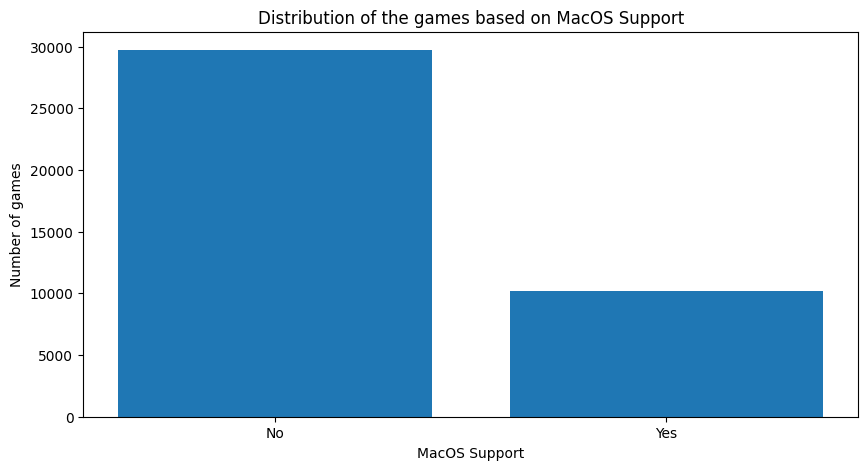

In [363]:
mac_support = data['mac_support'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(['No', 'Yes'], height=[mac_support.get(0, 0), mac_support.get(1, 0)])
plt.xlabel('MacOS Support')
plt.ylabel('Number of games')
plt.title('Distribution of the games based on MacOS Support')
plt.show()

In [364]:
mac_support = data['mac_support'].value_counts()
mac_support

mac_support
False    29725
True     10227
Name: count, dtype: int64

3/4 of games are not available on MacOS, while 1/4 are available.

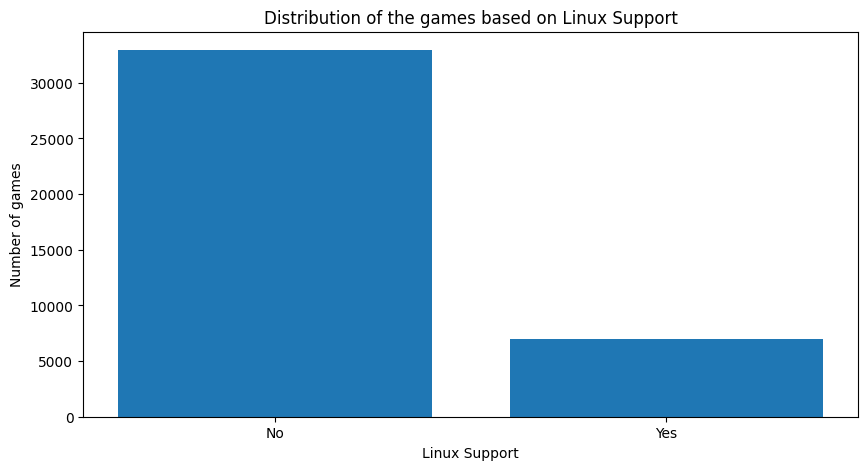

In [365]:
linux_support = data['linux_support'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(['No', 'Yes'], height=[linux_support.get(0, 0), linux_support.get(1, 0)])
plt.xlabel('Linux Support')
plt.ylabel('Number of games')
plt.title('Distribution of the games based on Linux Support')
plt.show()

In [366]:
linux_support

linux_support
False    32944
True      7008
Name: count, dtype: int64

33000 games are not available on Linux, while only 7000 are available on Linux.

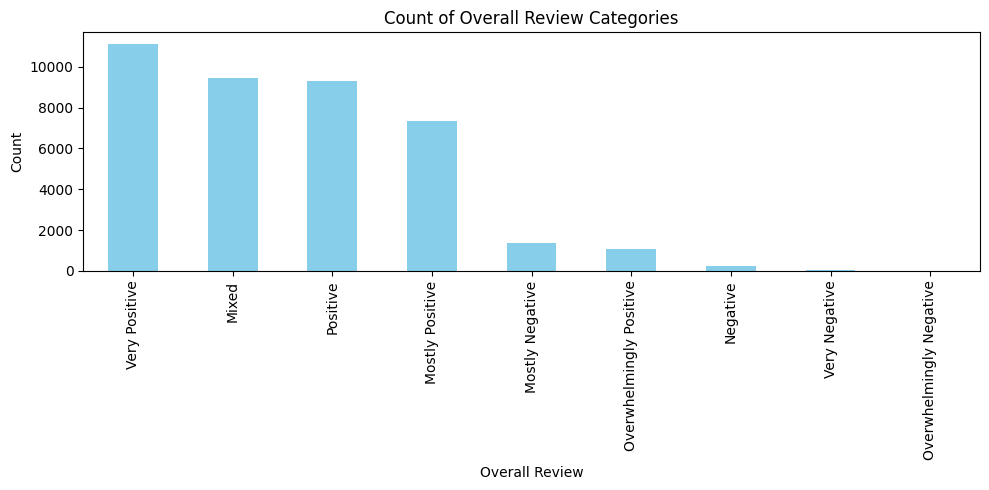

In [367]:
review_counts = data['overall_review'].value_counts()

plt.figure(figsize=(10, 5))
review_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Overall Review')
plt.ylabel('Count')
plt.title('Count of Overall Review Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Most of the games have positive reviews such as Very Positive, Mixed and Positive. Very few games hane Mostly Negative, Negative or Very Negative reviews.

###Multivariate Analysis

In [368]:
data.head()

,title,release_date,genres,categories,developer,publisher,discounted_price,dlc_available,age_rating,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,release_year
0,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,0.0,1,0,"For over two decades, Counter-Strike has offer...",True,False,True,1,Very Positive,87.0,8062218.0,2012
1,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,0.0,2,0,"Every day, millions of players worldwide enter...",True,True,True,0,Very Positive,81.0,2243112.0,2013
2,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,3999.0,0,1,A storm is coming. Venture into the complete G...,True,False,False,0,Very Positive,89.0,12294.0,2024
3,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,3599.0,2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,6,Very Positive,93.0,605191.0,2022
4,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,0.0,14,1,Destiny 2 is an action MMO with a single evolv...,True,False,False,0,Very Positive,80.0,594713.0,2019


In [369]:
data.tail()

,title,release_date,genres,categories,developer,publisher,discounted_price,dlc_available,age_rating,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,release_year
39947,Eternity's Child,"31 Jul, 2008","Adventure, Indie","Single-player, Steam Achievements, Includes le...",Luc Bernard,Silver Sphere Studios,0.0,0,0,"Eternity's Child, a quirky, hand drawn next ge...",True,False,False,0,Very Negative,14.0,57.0,2008
39948,Cyber Team Manager,"18 Jan, 2016","Casual, Indie, Simulation, Sports, Early Access","Single-player, Steam Trading Cards, Family Sha...",The Tambourine,The Tambourine\t,259.0,0,0,Do you ever dreamed of creating a cyber sports...,True,False,False,0,Very Negative,14.0,54.0,2016
39949,Spacebase DF-9,"27 Oct, 2014","Indie, Simulation, Strategy","Single-player, Steam Trading Cards, Steam Clou...",Double Fine Productions,Double Fine Productions,369.0,0,0,"In Spacebase DF-9, you'll build a home among t...",True,True,True,0,Overwhelmingly Negative,17.0,3299.0,2014
39950,Rise of Man,"15 Sep, 2017","Indie, Simulation, Strategy, Early Access","Single-player, Family Sharing",Darkcross Games,Darkcross Games,369.0,0,0,Rise of Man is a pre historic strategy game wi...,True,True,False,0,Very Negative,18.0,127.0,2017
39951,Blood of Magic,"18 Dec, 2015","Adventure, Indie, RPG, Simulation, Strategy, E...","Single-player, Steam Achievements, Steam Tradi...",Stoneworks Games,Stoneworks Games,369.0,0,0,Blood of Magic is a small open world role-play...,True,False,False,0,Very Negative,15.0,51.0,2015


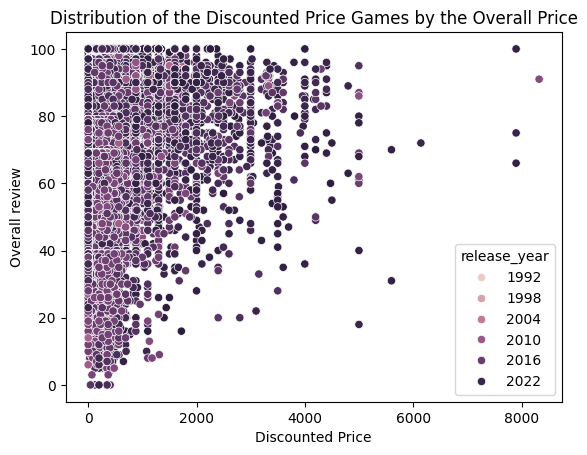

In [370]:
sns.scatterplot(x=data['discounted_price'], y=data['overall_review_%'], hue=data['release_year'])
plt.xlabel('Discounted Price')
plt.ylabel('Overall review')
plt.title('Distribution of the Discounted Price Games by the Overall Price')
plt.show()

A tendency that can be observed is that games that are newer (2016-2022) tend to be a bit more pricey and have better reviews.  Yet, games that are free can have any kind of reviews.

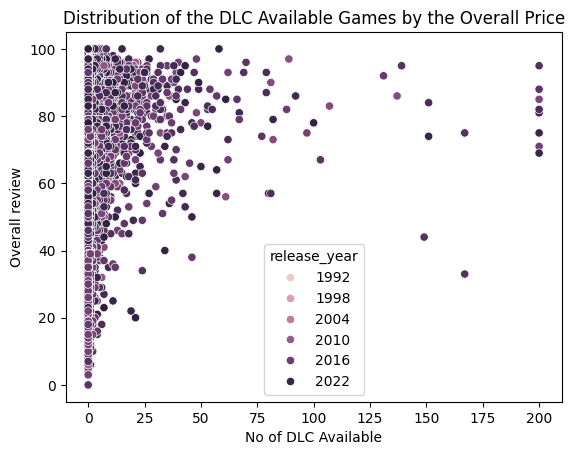

In [371]:
sns.scatterplot(x=data['dlc_available'], y=data['overall_review_%'], hue=data['release_year'])
plt.xlabel('No of DLC Available')
plt.ylabel('Overall review')
plt.title('Distribution of the DLC Available Games by the Overall Price')
plt.show()

Generally, games with DLC available tend to have better reviews, but games that do not have DLC available have the whole range of reviews. So, a game with DLC might have a higher review, but we cannot conclude what kind of review will have a game without DLC.

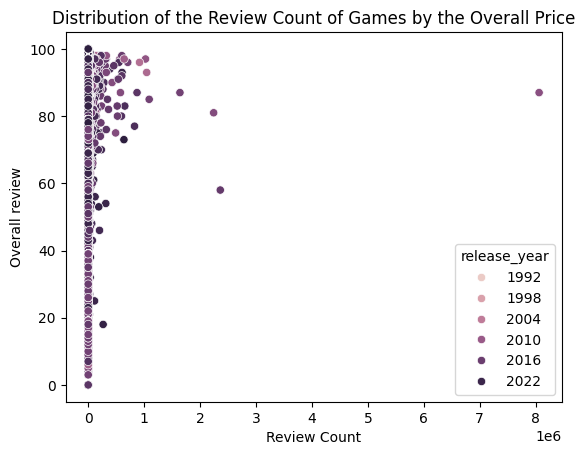

In [372]:
sns.scatterplot(x=data['overall_review_count'], y=data['overall_review_%'], hue=data['release_year'])
plt.xlabel('Review Count')
plt.ylabel('Overall review')
plt.title('Distribution of the Review Count of Games by the Overall Price')
plt.show()

Games with higher number of review count, have a higher overall review. But again, it is hard to make a conclusion about games that have a lower number of reviews.

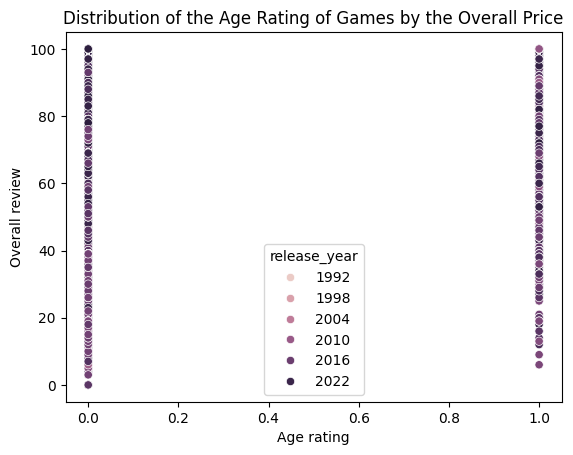

In [373]:
sns.scatterplot(x=data['age_rating'], y=data['overall_review_%'], hue=data['release_year'])
plt.xlabel('Age rating')
plt.ylabel('Overall review')
plt.title('Distribution of the Age Rating of Games by the Overall Price')
plt.show()

Even though games with age rate tend to get a bit higher reivew, there is not a definitory correlation that age rate games get better reviews. Actually, both types get a variety of reviews.

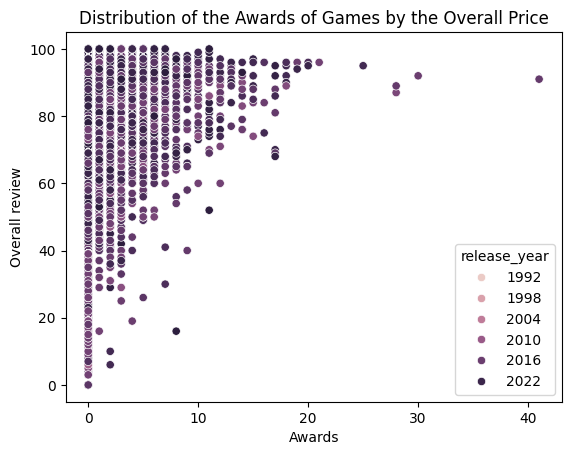

In [374]:
sns.scatterplot(x=data['awards'], y=data['overall_review_%'], hue=data['release_year'])
plt.xlabel('Awards')
plt.ylabel('Overall review')
plt.title('Distribution of the Awards of Games by the Overall Price')
plt.show()

We can see here that the higher the number of awards is, the better the overall review tends to be.

## Feature Engineering

There are some textual columns and I cannot get much information out of them. So we will process them into machine-interpretable information.

I cannot use the release date column, because there is a variety of date-times. But I think that the most important feature there is the year, so I will keep the column 'year' created above and drop the other one.

In [375]:
data = data.drop(columns=['release_date'])

In [376]:
data.head()

,title,genres,categories,developer,publisher,discounted_price,dlc_available,age_rating,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,release_year
0,Counter-Strike 2,"Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,0.0,1,0,"For over two decades, Counter-Strike has offer...",True,False,True,1,Very Positive,87.0,8062218.0,2012
1,Dota 2,"Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,0.0,2,0,"Every day, millions of players worldwide enter...",True,True,True,0,Very Positive,81.0,2243112.0,2013
2,Ghost of Tsushima DIRECTOR'S CUT,"Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,3999.0,0,1,A storm is coming. Venture into the complete G...,True,False,False,0,Very Positive,89.0,12294.0,2024
3,ELDEN RING,"Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,3599.0,2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,6,Very Positive,93.0,605191.0,2022
4,Destiny 2,"Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,0.0,14,1,Destiny 2 is an action MMO with a single evolv...,True,False,False,0,Very Positive,80.0,594713.0,2019


Before proceeding next, let's plot the correlation to see if we can reduce the dimension of our dataframe.

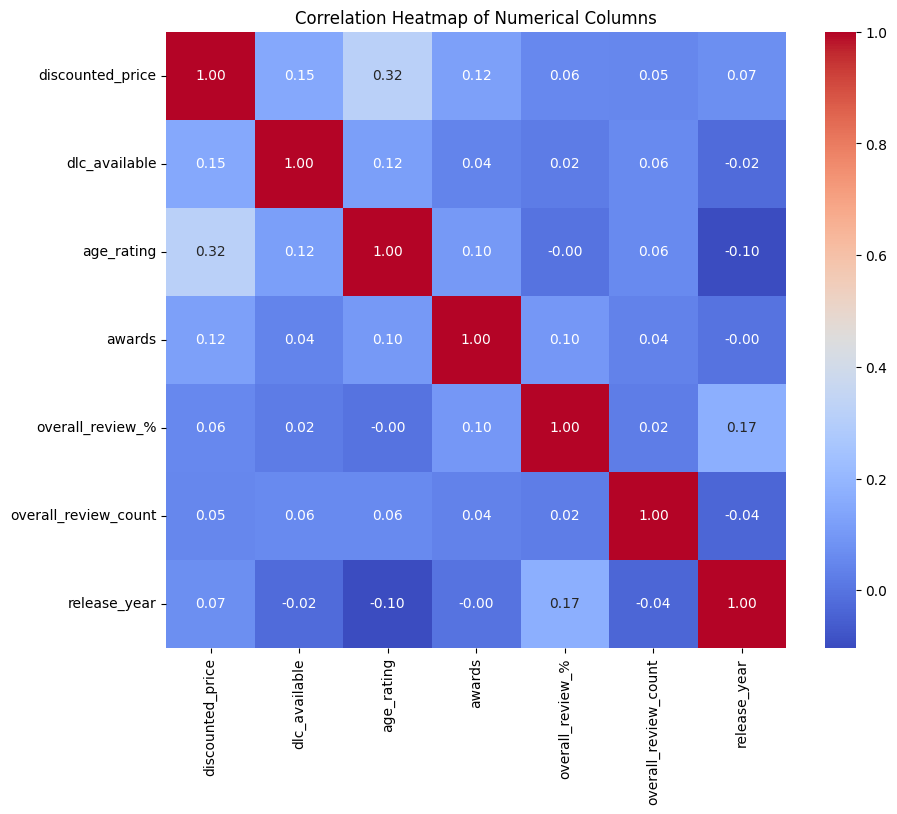

In [377]:
numerical_cols = data.select_dtypes(include='number').columns

corr = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

There isn't a strong correlation between any numerical column and the 'overall_review_%' column. We will leave the dataframe like this for know and take care of the categorical columns.

In [378]:
len(genre_counts)

22

There are 22 genres in total. The 'genres' column is not very machine-friendly. Let's separate each genre into individual columns like we have for operating systems.

In [379]:
unique_genres = set(g for sublist in data['genres'].str.split(', ') for g in sublist)

for genre in unique_genres:
    data[genre] = 0

for index, row in data.iterrows():
    for genre in row['genres'].split(', '):
        data.at[index, genre] = 1

In [380]:
data.head()

,title,genres,categories,developer,publisher,discounted_price,dlc_available,age_rating,about_description,win_support,...,RPG,Simulation,Video Production,Adventure,Design & Illustration,Massively Multiplayer,Free to Play,Indie,Movie,Casual
0,Counter-Strike 2,"Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,0.0,1,0,"For over two decades, Counter-Strike has offer...",True,...,0,0,0,0,0,0,1,0,0,0
1,Dota 2,"Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,0.0,2,0,"Every day, millions of players worldwide enter...",True,...,0,0,0,0,0,0,1,0,0,0
2,Ghost of Tsushima DIRECTOR'S CUT,"Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,3999.0,0,1,A storm is coming. Venture into the complete G...,True,...,0,0,0,1,0,0,0,0,0,0
3,ELDEN RING,"Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,3599.0,2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,...,1,0,0,0,0,0,0,0,0,0
4,Destiny 2,"Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,0.0,14,1,Destiny 2 is an action MMO with a single evolv...,True,...,0,0,0,1,0,0,1,0,0,0


In [381]:
data = data.drop(columns=['genres'])

In [382]:
len(category_counts)

36

We will proceed in the same way for 'categories' since there are only 36 categories.

In [383]:
unique_categories = set(g for sublist in data['categories'].str.split(', ') for g in sublist)

for category in unique_categories:
    data[category] = 0

for index, row in data.iterrows():
    for category in row['categories'].split(', '):
        data.at[index, category] = 1

In [384]:
data = data.drop(columns=['categories'])

In [385]:
data.head()

,title,developer,publisher,discounted_price,dlc_available,age_rating,about_description,win_support,mac_support,linux_support,...,Remote Play on Tablet,Stats,Steam Cloud,MMO,In-App Purchases,Steam Trading Cards,Shared/Split Screen Co-op,Includes Source SDK,Steam Workshop,Steam Achievements
0,Counter-Strike 2,Valve,Valve,0.0,1,0,"For over two decades, Counter-Strike has offer...",True,False,True,...,1,1,0,0,1,1,0,0,1,0
1,Dota 2,Valve,Valve,0.0,2,0,"Every day, millions of players worldwide enter...",True,True,True,...,0,0,0,0,1,1,0,0,1,0
2,Ghost of Tsushima DIRECTOR'S CUT,Sucker Punch Productions,PlayStation PC LLC,3999.0,0,1,A storm is coming. Venture into the complete G...,True,False,False,...,0,0,0,0,0,0,0,0,0,1
3,ELDEN RING,FromSoftware Inc.,FromSoftware Inc.,3599.0,2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,...,0,0,1,0,0,1,0,0,0,1
4,Destiny 2,Bungie,Bungie,0.0,14,1,Destiny 2 is an action MMO with a single evolv...,True,False,False,...,0,0,0,0,1,0,0,0,0,1


For the developer and publisher columns I cannot proceed in the same way, because I would get a very big sparse matrix and this will not be efficient. Instead, I believe that the reputation of a developer or publisher is important for game rating, though I will add new columns called average_developer_rating and average_publisher_rating, where I will add the average rating of the developer and, respectively, the average rating of the publisher from the whole dataset.

In [386]:
average_developer_rating = data.groupby('developer')['overall_review_%'].mean().to_dict()
average_publisher_rating = data.groupby('publisher')['overall_review_%'].mean().to_dict()

data['average_developer_rating'] = data['developer'].map(average_developer_rating)
data['average_publisher_rating'] = data['publisher'].map(average_publisher_rating)

In [387]:
data

,title,developer,publisher,discounted_price,dlc_available,age_rating,about_description,win_support,mac_support,linux_support,...,Steam Cloud,MMO,In-App Purchases,Steam Trading Cards,Shared/Split Screen Co-op,Includes Source SDK,Steam Workshop,Steam Achievements,average_developer_rating,average_publisher_rating
0,Counter-Strike 2,Valve,Valve,0.0,1,0,"For over two decades, Counter-Strike has offer...",True,False,True,...,0,0,1,1,0,0,1,0,89.695652,90.230769
1,Dota 2,Valve,Valve,0.0,2,0,"Every day, millions of players worldwide enter...",True,True,True,...,0,0,1,1,0,0,1,0,89.695652,90.230769
2,Ghost of Tsushima DIRECTOR'S CUT,Sucker Punch Productions,PlayStation PC LLC,3999.0,0,1,A storm is coming. Venture into the complete G...,True,False,False,...,0,0,0,0,0,0,0,1,61.500000,85.500000
3,ELDEN RING,FromSoftware Inc.,FromSoftware Inc.,3599.0,2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,...,1,0,0,1,0,0,0,1,91.500000,91.500000
4,Destiny 2,Bungie,Bungie,0.0,14,1,Destiny 2 is an action MMO with a single evolv...,True,False,False,...,0,0,1,0,0,0,0,1,80.000000,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39947,Eternity's Child,Luc Bernard,Silver Sphere Studios,0.0,0,0,"Eternity's Child, a quirky, hand drawn next ge...",True,False,False,...,0,0,0,0,0,0,0,1,14.000000,14.000000
39948,Cyber Team Manager,The Tambourine,The Tambourine\t,259.0,0,0,Do you ever dreamed of creating a cyber sports...,True,False,False,...,0,0,0,1,0,0,0,0,19.000000,14.000000
39949,Spacebase DF-9,Double Fine Productions,Double Fine Productions,369.0,0,0,"In Spacebase DF-9, you'll build a home among t...",True,True,True,...,1,0,0,1,0,0,0,0,84.875000,83.461538
39950,Rise of Man,Darkcross Games,Darkcross Games,369.0,0,0,Rise of Man is a pre historic strategy game wi...,True,True,False,...,0,0,0,0,0,0,0,0,18.000000,18.000000


In [388]:
data = data.drop(columns=['developer', 'publisher'])

For the mac_support, win_support, and linux_support, we will change the True values to 1 and False values to 0.

In [389]:
data['win_support'] = data['win_support'].astype(int)
data['linux_support'] = data['linux_support'].astype(int)
data['mac_support'] = data['mac_support'].astype(int)

All games, except 3, have Windows support, so this column is irrelevant. We will drop it.

In [390]:
data = data.drop(columns=['win_support'])

In [391]:
data

,title,discounted_price,dlc_available,age_rating,about_description,mac_support,linux_support,awards,overall_review,overall_review_%,...,Steam Cloud,MMO,In-App Purchases,Steam Trading Cards,Shared/Split Screen Co-op,Includes Source SDK,Steam Workshop,Steam Achievements,average_developer_rating,average_publisher_rating
0,Counter-Strike 2,0.0,1,0,"For over two decades, Counter-Strike has offer...",0,1,1,Very Positive,87.0,...,0,0,1,1,0,0,1,0,89.695652,90.230769
1,Dota 2,0.0,2,0,"Every day, millions of players worldwide enter...",1,1,0,Very Positive,81.0,...,0,0,1,1,0,0,1,0,89.695652,90.230769
2,Ghost of Tsushima DIRECTOR'S CUT,3999.0,0,1,A storm is coming. Venture into the complete G...,0,0,0,Very Positive,89.0,...,0,0,0,0,0,0,0,1,61.500000,85.500000
3,ELDEN RING,3599.0,2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",0,0,6,Very Positive,93.0,...,1,0,0,1,0,0,0,1,91.500000,91.500000
4,Destiny 2,0.0,14,1,Destiny 2 is an action MMO with a single evolv...,0,0,0,Very Positive,80.0,...,0,0,1,0,0,0,0,1,80.000000,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39947,Eternity's Child,0.0,0,0,"Eternity's Child, a quirky, hand drawn next ge...",0,0,0,Very Negative,14.0,...,0,0,0,0,0,0,0,1,14.000000,14.000000
39948,Cyber Team Manager,259.0,0,0,Do you ever dreamed of creating a cyber sports...,0,0,0,Very Negative,14.0,...,0,0,0,1,0,0,0,0,19.000000,14.000000
39949,Spacebase DF-9,369.0,0,0,"In Spacebase DF-9, you'll build a home among t...",1,1,0,Overwhelmingly Negative,17.0,...,1,0,0,1,0,0,0,0,84.875000,83.461538
39950,Rise of Man,369.0,0,0,Rise of Man is a pre historic strategy game wi...,1,0,0,Very Negative,18.0,...,0,0,0,0,0,0,0,0,18.000000,18.000000


Check the number of unique values in the 'overall_review' column.

In [392]:
data['overall_review'].value_counts()

overall_review
Very Positive              11128
Mixed                       9467
Positive                    9307
Mostly Positive             7345
Mostly Negative             1357
Overwhelmingly Positive     1084
Negative                     226
Very Negative                 30
Overwhelmingly Negative        8
Name: count, dtype: int64

There aren't that many values, so we can apply one hot encoding.

In [393]:
data = pd.get_dummies(data, columns=['overall_review'])

In [394]:
data

,title,discounted_price,dlc_available,age_rating,about_description,mac_support,linux_support,awards,overall_review_%,overall_review_count,...,average_publisher_rating,overall_review_Mixed,overall_review_Mostly Negative,overall_review_Mostly Positive,overall_review_Negative,overall_review_Overwhelmingly Negative,overall_review_Overwhelmingly Positive,overall_review_Positive,overall_review_Very Negative,overall_review_Very Positive
0,Counter-Strike 2,0.0,1,0,"For over two decades, Counter-Strike has offer...",0,1,1,87.0,8062218.0,...,90.230769,False,False,False,False,False,False,False,False,True
1,Dota 2,0.0,2,0,"Every day, millions of players worldwide enter...",1,1,0,81.0,2243112.0,...,90.230769,False,False,False,False,False,False,False,False,True
2,Ghost of Tsushima DIRECTOR'S CUT,3999.0,0,1,A storm is coming. Venture into the complete G...,0,0,0,89.0,12294.0,...,85.500000,False,False,False,False,False,False,False,False,True
3,ELDEN RING,3599.0,2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",0,0,6,93.0,605191.0,...,91.500000,False,False,False,False,False,False,False,False,True
4,Destiny 2,0.0,14,1,Destiny 2 is an action MMO with a single evolv...,0,0,0,80.0,594713.0,...,80.000000,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39947,Eternity's Child,0.0,0,0,"Eternity's Child, a quirky, hand drawn next ge...",0,0,0,14.0,57.0,...,14.000000,False,False,False,False,False,False,False,True,False
39948,Cyber Team Manager,259.0,0,0,Do you ever dreamed of creating a cyber sports...,0,0,0,14.0,54.0,...,14.000000,False,False,False,False,False,False,False,True,False
39949,Spacebase DF-9,369.0,0,0,"In Spacebase DF-9, you'll build a home among t...",1,1,0,17.0,3299.0,...,83.461538,False,False,False,False,True,False,False,False,False
39950,Rise of Man,369.0,0,0,Rise of Man is a pre historic strategy game wi...,1,0,0,18.0,127.0,...,18.000000,False,False,False,False,False,False,False,True,False


In [395]:
data = data.drop(columns=['overall_review_Overwhelmingly Negative'])

The column that contains the most text is the 'about_description' column. We will try to vectorize it and apply some NLP techniques to prepare it for fitting.

In [315]:
# !pip install nltk

In [175]:
# import pandas as pd
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# import string
# from sklearn.feature_extraction.text import TfidfVectorizer

# nltk.download('punkt')
# nltk.download('stopwords')

In [111]:
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     # Tokenize the text
#     tokens = word_tokenize(text)
#     # Convert to lowercase
#     tokens = [word.lower() for word in tokens]
#     # Remove punctuation
#     tokens = [word for word in tokens if word.isalnum()]
#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     tokens = [word for word in tokens if word not in stop_words]
#     # Apply stemming
#     tokens = [stemmer.stem(word) for word in tokens]
#     return ' '.join(tokens)

# data['about_description_processed'] = data['about_description'].apply(preprocess_text)
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(data['about_description_processed'])
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# tfidf_df

,00,000,006,02,020880,029,03,07th,09,0f,...,𝔾𝕠𝕕𝕕𝕖𝕤𝕤,𝖒𝖚𝖘𝖎𝖈,𝗖𝗵𝗮𝗹𝗹𝗲𝗻𝗴𝗲,𝗘𝗥𝗖,𝗠𝗲𝗰𝗵𝗮𝗻𝗶𝗰,𝗥𝗼𝘃𝗲𝗿,𝗮𝘄𝗮𝘆,𝘀𝘄𝗼𝗿𝗱,𝘁𝗵𝗿𝗼𝘄𝗶𝗻𝗴,𝘆𝗼𝘂𝗿
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The new dataframe I get is very big and when I try to concatenate it with my previous dataset, I end up using all of the RAM. Since this isn't even my main column, I will drop it and focus on getting the most out of the numerical columns.

In [396]:
data = data.drop(columns=['about_description'])

Now we will analyze for outliers.

We will skip analyzing the outliers on the categorical columns, that used to be textual earlier and focus on the continuous columns.

In [397]:
data.columns

Index(['title', 'discounted_price', 'dlc_available', 'age_rating',
       'mac_support', 'linux_support', 'awards', 'overall_review_%',
       'overall_review_count', 'release_year', 'Strategy', 'Racing', 'Action',
       'Early Access', 'Software Training', 'Audio Production', 'Utilities',
       'Education', 'Game Development', 'Sports', 'Animation & Modeling',
       'Web Publishing', 'RPG', 'Simulation', 'Video Production', 'Adventure',
       'Design & Illustration', 'Massively Multiplayer', 'Free to Play',
       'Indie', 'Movie', 'Casual', 'LAN Co-op', 'VR Only', 'Remote Play on TV',
       'Profile Features Limited', 'Remote Play on Phone', 'Online Co-op',
       'VR Supported', 'Remote Play Together', 'SteamVR Collectibles',
       'HDR available', 'Steam Turn Notifications', 'Online PvP',
       'Valve Anti-Cheat enabled', 'Commentary available', 'LAN PvP',
       'Single-player', 'Captions available', 'Steam Leaderboards',
       'Cross-Platform Multiplayer', 'Mods',
       

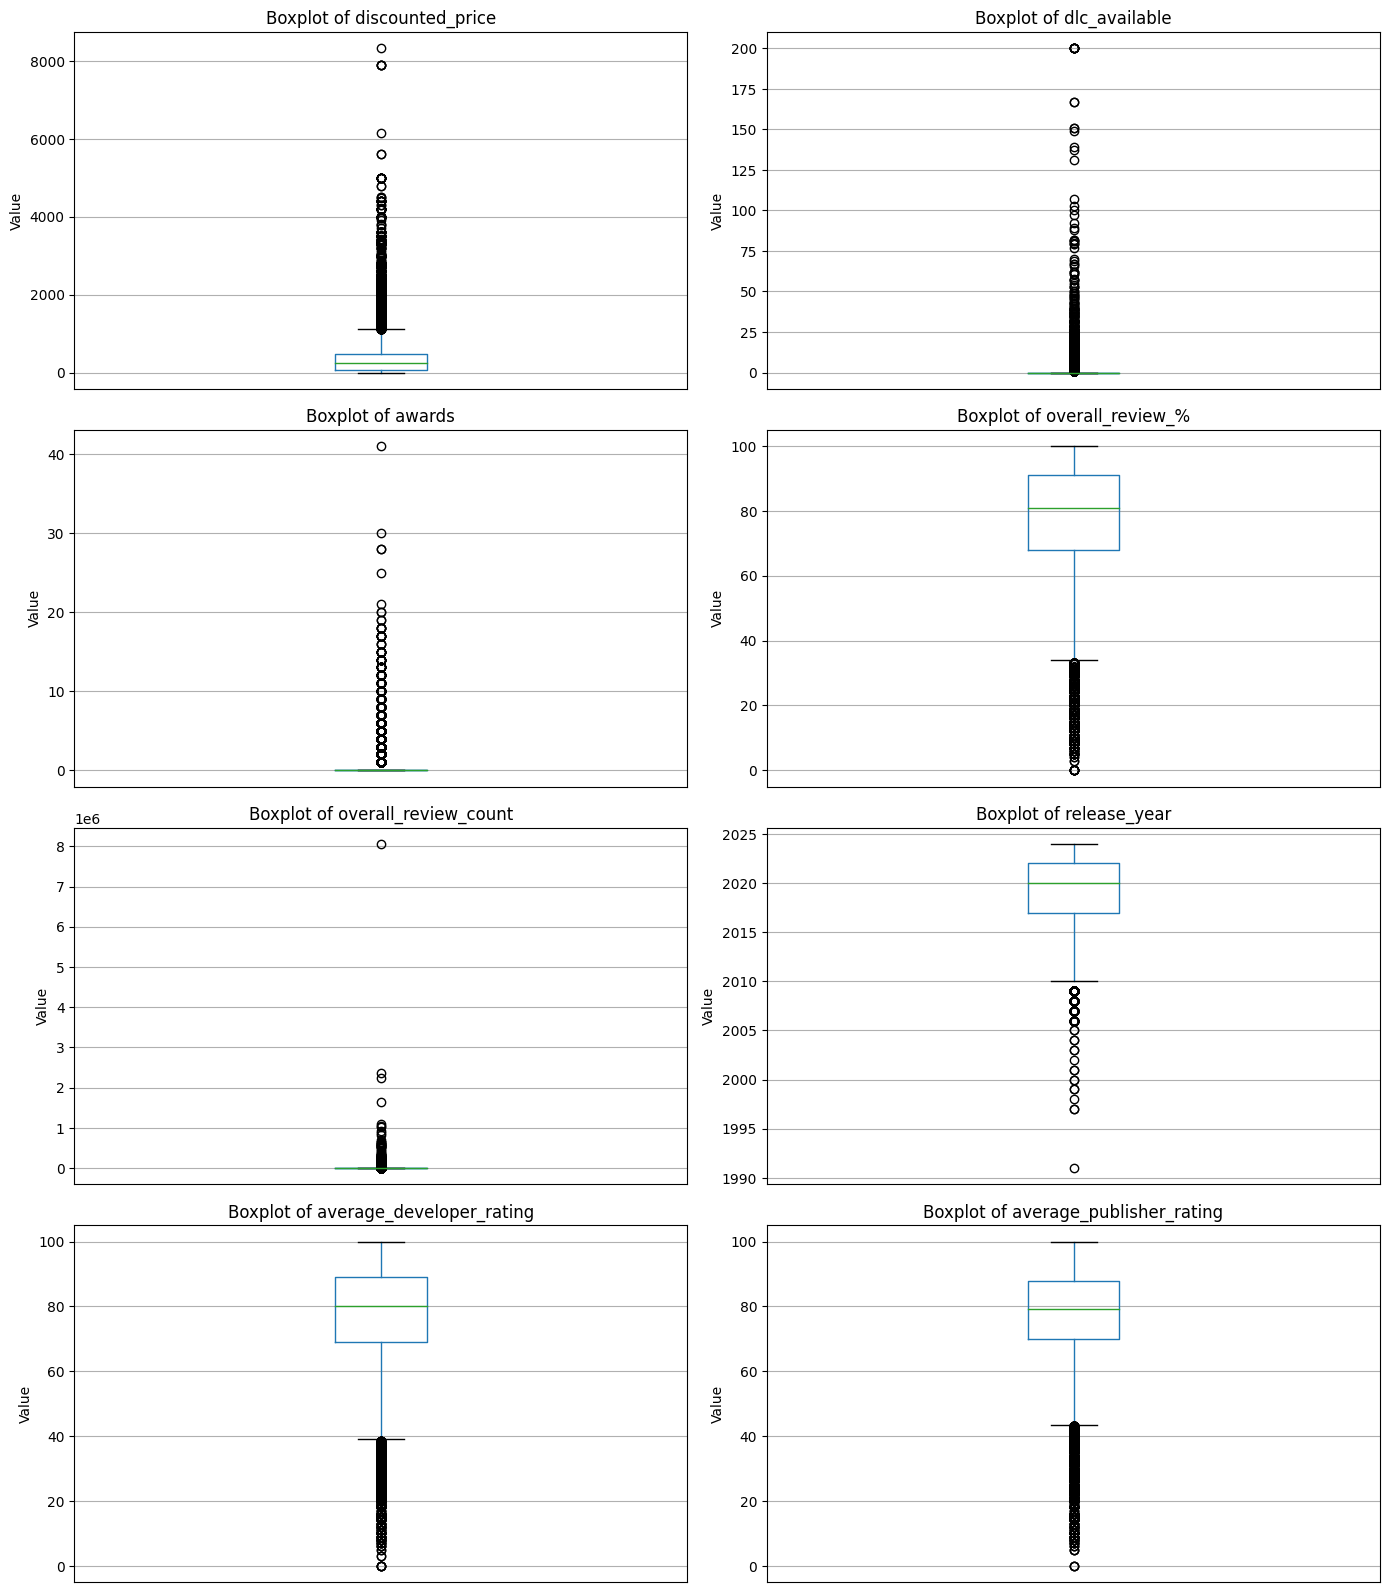

In [398]:
columns_of_interest = [
    'discounted_price', 'dlc_available', 'awards',
    'overall_review_%', 'overall_review_count', 'release_year',
    'average_developer_rating', 'average_publisher_rating'
]

plt.figure(figsize=(14, 20))

for i, col in enumerate(columns_of_interest):
    plt.subplot(len(columns_of_interest) // 2 + 1, 2, i + 1)
    data.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Value')
    plt.xticks([])

plt.tight_layout()
plt.show()


It seems that we have a lot of outliers, mainly because is most columns have 0 as a dominant value, and the rest of values results in outliers.

We cannot delete them, because we will lose important information. Instead we will transform them to categorical values.

In [399]:
def create_bins(series, num_bins=5):
    bins = pd.qcut(series, q=num_bins, labels=False, duplicates='drop')
    labels = [f'Bin_{i}' for i in range(len(bins.unique()))]
    return bins, labels

columns_of_interest = [
    'discounted_price', 'dlc_available', 'release_year',
    'average_developer_rating', 'average_publisher_rating'
]

for col in columns_of_interest:
    bins, labels = create_bins(data[col])
    data[f'{col}_category'] = pd.cut(data[col], bins=len(labels), labels=labels)

data

,title,discounted_price,dlc_available,age_rating,mac_support,linux_support,awards,overall_review_%,overall_review_count,release_year,...,overall_review_Negative,overall_review_Overwhelmingly Positive,overall_review_Positive,overall_review_Very Negative,overall_review_Very Positive,discounted_price_category,dlc_available_category,release_year_category,average_developer_rating_category,average_publisher_rating_category
0,Counter-Strike 2,0.0,1,0,0,1,1,87.0,8062218.0,2012,...,False,False,False,False,True,Bin_0,Bin_0,Bin_3,Bin_4,Bin_4
1,Dota 2,0.0,2,0,1,1,0,81.0,2243112.0,2013,...,False,False,False,False,True,Bin_0,Bin_0,Bin_3,Bin_4,Bin_4
2,Ghost of Tsushima DIRECTOR'S CUT,3999.0,0,1,0,0,0,89.0,12294.0,2024,...,False,False,False,False,True,Bin_2,Bin_0,Bin_4,Bin_3,Bin_4
3,ELDEN RING,3599.0,2,1,0,0,6,93.0,605191.0,2022,...,False,False,False,False,True,Bin_2,Bin_0,Bin_4,Bin_4,Bin_4
4,Destiny 2,0.0,14,1,0,0,0,80.0,594713.0,2019,...,False,False,False,False,True,Bin_0,Bin_0,Bin_4,Bin_3,Bin_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39947,Eternity's Child,0.0,0,0,0,0,0,14.0,57.0,2008,...,False,False,False,True,False,Bin_0,Bin_0,Bin_2,Bin_0,Bin_0
39948,Cyber Team Manager,259.0,0,0,0,0,0,14.0,54.0,2016,...,False,False,False,True,False,Bin_0,Bin_0,Bin_3,Bin_0,Bin_0
39949,Spacebase DF-9,369.0,0,0,1,1,0,17.0,3299.0,2014,...,False,False,False,False,False,Bin_0,Bin_0,Bin_3,Bin_4,Bin_4
39950,Rise of Man,369.0,0,0,1,0,0,18.0,127.0,2017,...,False,False,False,True,False,Bin_0,Bin_0,Bin_3,Bin_0,Bin_0


Now we will drop those columns.

In [400]:
data = data.drop(columns=columns_of_interest)

And we will apply one-hot encoding one last time.

In [401]:
data.columns

Index(['title', 'age_rating', 'mac_support', 'linux_support', 'awards',
       'overall_review_%', 'overall_review_count', 'Strategy', 'Racing',
       'Action', 'Early Access', 'Software Training', 'Audio Production',
       'Utilities', 'Education', 'Game Development', 'Sports',
       'Animation & Modeling', 'Web Publishing', 'RPG', 'Simulation',
       'Video Production', 'Adventure', 'Design & Illustration',
       'Massively Multiplayer', 'Free to Play', 'Indie', 'Movie', 'Casual',
       'LAN Co-op', 'VR Only', 'Remote Play on TV', 'Profile Features Limited',
       'Remote Play on Phone', 'Online Co-op', 'VR Supported',
       'Remote Play Together', 'SteamVR Collectibles', 'HDR available',
       'Steam Turn Notifications', 'Online PvP', 'Valve Anti-Cheat enabled',
       'Commentary available', 'LAN PvP', 'Single-player',
       'Captions available', 'Steam Leaderboards',
       'Cross-Platform Multiplayer', 'Mods',
       'Steam is learning about this game', 'Mods (require H

In [402]:
data = pd.get_dummies(data, columns=['discounted_price_category'])
data = data.drop(columns=['discounted_price_category_Bin_4'])

In [403]:
data = pd.get_dummies(data, columns=['dlc_available_category'])
data = data.drop(columns=['dlc_available_category_Bin_1'])

In [404]:
data = pd.get_dummies(data, columns=['release_year_category'])
data = data.drop(columns=['release_year_category_Bin_0'])

In [405]:
data = pd.get_dummies(data, columns=['average_developer_rating_category'])
data = data.drop(columns=['average_developer_rating_category_Bin_0'])

In [406]:
data = pd.get_dummies(data, columns=['average_publisher_rating_category'])
data = data.drop(columns=['average_publisher_rating_category_Bin_0'])

In [407]:
data.head()

,title,age_rating,mac_support,linux_support,awards,overall_review_%,overall_review_count,Strategy,Racing,Action,...,release_year_category_Bin_3,release_year_category_Bin_4,average_developer_rating_category_Bin_1,average_developer_rating_category_Bin_2,average_developer_rating_category_Bin_3,average_developer_rating_category_Bin_4,average_publisher_rating_category_Bin_1,average_publisher_rating_category_Bin_2,average_publisher_rating_category_Bin_3,average_publisher_rating_category_Bin_4
0,Counter-Strike 2,0,0,1,1,87.0,8062218.0,0,0,1,...,True,False,False,False,False,True,False,False,False,True
1,Dota 2,0,1,1,0,81.0,2243112.0,1,0,1,...,True,False,False,False,False,True,False,False,False,True
2,Ghost of Tsushima DIRECTOR'S CUT,1,0,0,0,89.0,12294.0,0,0,1,...,False,True,False,False,True,False,False,False,False,True
3,ELDEN RING,1,0,0,6,93.0,605191.0,0,0,1,...,False,True,False,False,False,True,False,False,False,True
4,Destiny 2,1,0,0,0,80.0,594713.0,0,0,1,...,False,True,False,False,True,False,False,False,True,False


In [408]:
data.columns

Index(['title', 'age_rating', 'mac_support', 'linux_support', 'awards',
       'overall_review_%', 'overall_review_count', 'Strategy', 'Racing',
       'Action', 'Early Access', 'Software Training', 'Audio Production',
       'Utilities', 'Education', 'Game Development', 'Sports',
       'Animation & Modeling', 'Web Publishing', 'RPG', 'Simulation',
       'Video Production', 'Adventure', 'Design & Illustration',
       'Massively Multiplayer', 'Free to Play', 'Indie', 'Movie', 'Casual',
       'LAN Co-op', 'VR Only', 'Remote Play on TV', 'Profile Features Limited',
       'Remote Play on Phone', 'Online Co-op', 'VR Supported',
       'Remote Play Together', 'SteamVR Collectibles', 'HDR available',
       'Steam Turn Notifications', 'Online PvP', 'Valve Anti-Cheat enabled',
       'Commentary available', 'LAN PvP', 'Single-player',
       'Captions available', 'Steam Leaderboards',
       'Cross-Platform Multiplayer', 'Mods',
       'Steam is learning about this game', 'Mods (require H

 For boolean columns, we will change the True values to 1 and False values to 0.

In [409]:
columns_to_numerical = ['overall_review_Mixed', 'overall_review_Mostly Negative', 'overall_review_Mostly Positive', 'overall_review_Negative',
       'overall_review_Overwhelmingly Positive', 'overall_review_Positive', 'overall_review_Very Negative', 'overall_review_Very Positive',
       'discounted_price_category_Bin_0', 'discounted_price_category_Bin_1', 'discounted_price_category_Bin_2', 'discounted_price_category_Bin_3',
       'dlc_available_category_Bin_0', 'release_year_category_Bin_1', 'release_year_category_Bin_2', 'release_year_category_Bin_3',
       'release_year_category_Bin_4', 'average_developer_rating_category_Bin_1', 'average_developer_rating_category_Bin_2', 'average_developer_rating_category_Bin_3',
       'average_developer_rating_category_Bin_4', 'average_publisher_rating_category_Bin_1', 'average_publisher_rating_category_Bin_2','average_publisher_rating_category_Bin_3',
       'average_publisher_rating_category_Bin_4']

for column in columns_to_numerical:
  data[column] = data[column].astype(int)

In [410]:
data.head()

,title,age_rating,mac_support,linux_support,awards,overall_review_%,overall_review_count,Strategy,Racing,Action,...,release_year_category_Bin_3,release_year_category_Bin_4,average_developer_rating_category_Bin_1,average_developer_rating_category_Bin_2,average_developer_rating_category_Bin_3,average_developer_rating_category_Bin_4,average_publisher_rating_category_Bin_1,average_publisher_rating_category_Bin_2,average_publisher_rating_category_Bin_3,average_publisher_rating_category_Bin_4
0,Counter-Strike 2,0,0,1,1,87.0,8062218.0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,Dota 2,0,1,1,0,81.0,2243112.0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
2,Ghost of Tsushima DIRECTOR'S CUT,1,0,0,0,89.0,12294.0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,ELDEN RING,1,0,0,6,93.0,605191.0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,Destiny 2,1,0,0,0,80.0,594713.0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


Let's save the new dataframe in a CSV file.

In [340]:
data.to_csv('data_v5.csv')

The next part of this project is [here](https://colab.research.google.com/drive/1PEMbGZX4oBtj3-zrswGvd4DS3AZCseW7?usp=sharing).